## Titanic - Machine Learning from Disaster
#### Predict survival on the Titanic and get familiar with ML basic

### Loading the Data

In [1]:
# The Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
#set style for sns plots
sns.set()

In [3]:
#read the train data set
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#create a df with survived column
survived = train_df['Survived']
print(train_df['Survived'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [5]:
#describe
print(train_df['Survived'].describe())

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


In [6]:
#info of train data set
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#describe dataset
train_df.describe()
#Age column values 714 and the others columns 891 (missing values)
# Age Mean 29.69
# Age Min 0.42 ?
# Age Max 80

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Preliminary Analysis of Data

In [8]:
#Null values 
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
#call any method
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [14]:
# check de number with sum()
train_df.isnull().sum()
#Age = 177 null values 
#Cabin = 687 null values
#Embarked = 2 null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# calculate the % of it 
train_df.isnull().sum() / train_df.shape[0]*100 # 0 = row
# Age = 19.86% missing values 
# Cabin = 77.10 missing values
# Embarked 0.22 missing values 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [18]:
# store null values into a variable 
nulls = train_df.isnull().sum()
nulls

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

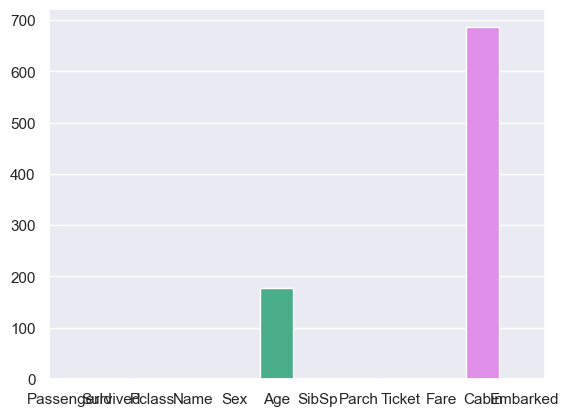

In [20]:
# create a barplot with the variable nulls
sns.barplot(x=nulls.index,y=nulls) #nulls.index = name of columns,  nulls = the numeric values 

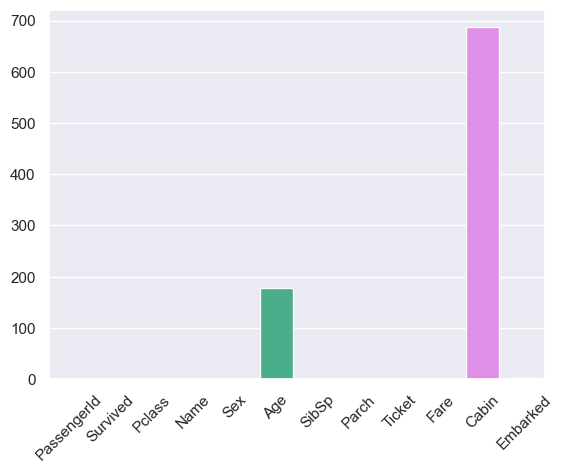

In [22]:
# more readable 
g = sns.barplot(x=nulls.index,y=nulls)
g.set_xticklabels(nulls.index,rotation=45)
plt.show()

<Axes: >

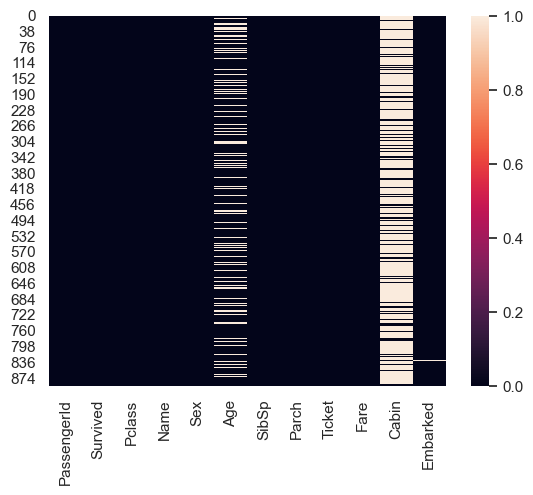

In [23]:
#heatmap with the original df
sns.heatmap(train_df.isnull())

### Data Cleanup

In [25]:
nulls = train_df.isnull().sum()
nulls
#Age = 19.86% missing 
#Cabin = 77.10 % missing 
#Embarked = 0.22

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
#call column Age
train_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

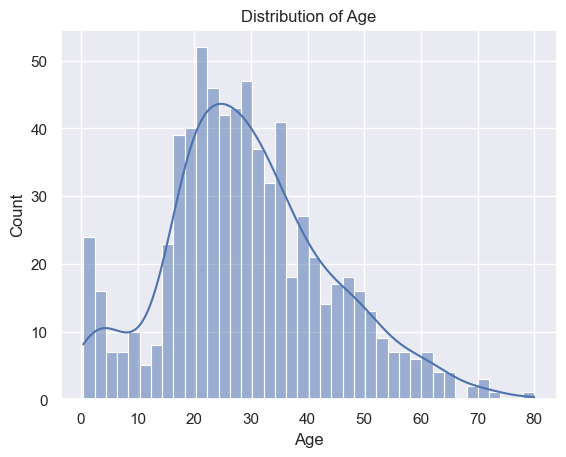

In [36]:
# create a histogram plot of the 'Age' column
sns.histplot(train_df['Age'], kde=True, bins=40) #distplot are no updated

# set the title and axis labels
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# display the plot
plt.show()

In [41]:
#the mean of the df
train_df['Age'].mean()

29.69911764705882

In [44]:
#the median
train_df['Age'].median()
#we have to take a call because this data is actually skewed on the right side, using median will be a little bit better choice

28.0

In [47]:
#lets fill NaN values and fill it with the median value and save the change
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [48]:
#missing values again in Age column?
train_df.isnull().sum() / train_df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

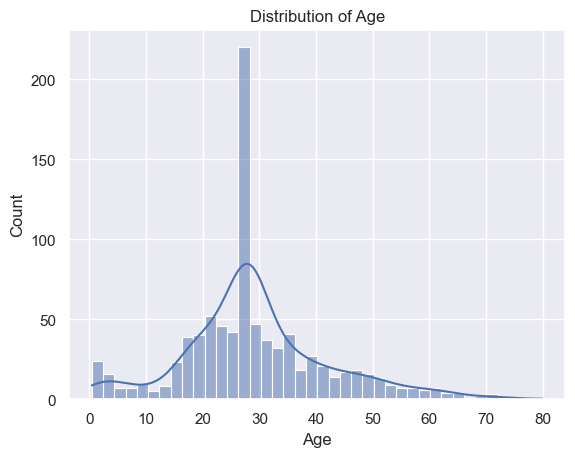

In [49]:
# create a histogram plot of the 'Age' column
sns.histplot(train_df['Age'], kde=True, bins=40) #distplot are no updated

# set the title and axis labels
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# display the plot
plt.show()

In [51]:
#drop the cabin column
train_df.drop('Cabin', axis=1, inplace=True)

In [52]:
#cabin column? dropped
train_df.isnull().sum() / train_df.shape[0]*100

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [53]:
#Embarked column values amount
train_df.isnull().sum(),#embarked = 2 missing values 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [54]:
#check the values of Embarked column
train_df['Embarked'].value_counts()
#S the most comun one / fill it with S values of the same column

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [55]:
train_df['Embarked'].fillna('S', inplace=True)

In [56]:
#check if we still are having missing value in Embarket column
train_df.isnull().sum() # e violaaa! alles erledigt! 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [57]:
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [58]:
#do we need the name column?
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [61]:
#drop the unuseful columns that not affect the final result 
train_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True) # axis 1  = columns

In [62]:
#lets look at the df again
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
